In [19]:
!pip install gensim

import pandas as pd
import gensim
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

df = pd.read_csv('df_total.csv')
df.head()

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


In [20]:
corpus = df['news'].tolist()
sentences = [frase.lower().split() for frase in corpus]
print(sentences[0])

['durante', 'el', 'foro', 'la', 'banca', 'articulador', 'empresarial', 'para', 'el', 'desarrollo', 'sostenible', 'el', 'director', 'de', 'sostenibilidad', 'y', 'clientes', 'globales', 'de', 'bbva', 'en', 'colombia', 'andrés', 'garcía', 'aseguró', 'que', 'es', 'importante', 'entender', 'que', 'la', 'sostenibilidad', 'no', 'la', 'podemos', 'asociar', 'a', 'mayores', 'costos.', 'yo', 'creo', 'que', 'el', 'no', 'tener', 'un', 'concepto', 'de', 'negocio', 'sostenible', 'puede', 'tener', 'un', 'mayor', 'impacto', 'de', 'lo', 'que', 'imaginamos.para', 'garcía', 'el', 'reto', 'más', 'importante', 'es', 'no', 'cambiar', 'prioridades', 'ni', 'que', 'compitan', 'entre', 'sí', 'necesariamente.', 'en', 'muchos', 'de', 'los', 'casos', 'se', 'debe', 'tratar', 'de', 'mantener', 'la', 'prioridad', 'en', 'cuanto', 'a', 'la', 'ambición', 'de', 'negocios', 'más', 'sostenibles', 'un', 'reto', 'enorme', 'por', 'la', 'coyuntura.', 'la', 'sostenibilidad', 'nos', 'abre', 'oportunidades', 'a', 'mejores', 'fuent

In [14]:
model = Word2Vec(
    sentences,
    vector_size=50,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

print(model.wv["estudiante"])
print(len(model.wv["estudiante"]))

[ 1.02246277e-01  5.45724705e-02  9.06755254e-02  7.96509683e-02
 -3.48483063e-02  7.88053498e-04  4.19519544e-02  2.88783371e-01
 -2.44446293e-01 -4.88473698e-02  3.66915390e-02 -2.71261603e-01
  4.60290574e-02  1.47028908e-01 -1.70327201e-01 -1.25186324e-01
  1.61657274e-01  1.44558936e-01 -1.91481173e-01 -1.81163460e-01
  1.25587195e-01 -1.02733426e-01  4.85738397e-01 -2.65195481e-02
  1.05210960e-01 -5.93987815e-02 -1.78917482e-01  9.03394260e-03
 -1.14912847e-02  1.81742102e-01  7.20293960e-03 -1.31692678e-01
  1.25742003e-01  2.63560824e-02 -2.21730858e-01  4.95738685e-02
 -1.39963668e-04  7.61350468e-02  9.73450318e-02 -7.48781785e-02
  2.24667966e-01  2.97355372e-02 -1.65766284e-01 -1.23266205e-02
  3.29799265e-01  8.74798074e-02  1.27133220e-01 -6.17885403e-02
  9.04644951e-02  1.83501273e-01]
50


In [15]:
palabras_a_graficar = [
    "mujer",
    "hombre",
    "joven",
    "viejo",
    "gordo",
    "gorda",
    "inmigrante",
    "refugiado",
    "experto",
    "ángel",
    "villano"
]

palabras_validas = [p for p in palabras_a_graficar if p in model.wv]
print("Palabras que se van a graficar:", palabras_validas)

Palabras que se van a graficar: ['mujer', 'hombre', 'joven', 'viejo', 'refugiado', 'experto', 'ángel']


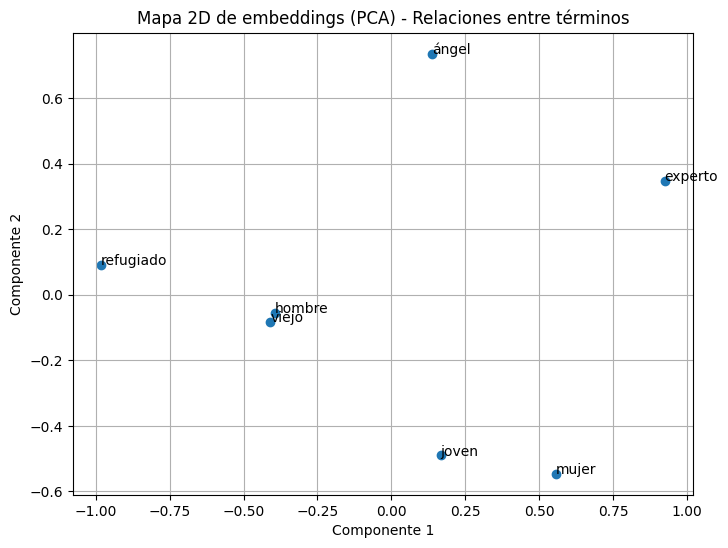

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vectores = [model.wv[p] for p in palabras_validas]

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectores)

plt.figure(figsize=(8,6))

x_vals = coords_2d[:, 0]
y_vals = coords_2d[:, 1]

plt.scatter(x_vals, y_vals)

for i, palabra in enumerate(palabras_validas):
    plt.annotate(palabra, (x_vals[i], y_vals[i]))

plt.title("Mapa 2D de embeddings (PCA) - Relaciones entre términos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()